# Climate Portfolio Post - St.Petersburg, Russia

## Site Description

St. Petersburg, Russia like many sea level cities, is feeling the effects 
of climate change. St. Petersburg sits at about 3 meter high elevation on
the eastern most edge of the Gulf of Finland which is one of the western
most parts of Russia. St. Petersburg is one of the two largest cities in
Russia along with Moscow, and dealing with rising sea levels, floods, 
and warmer temperatures.

Previous studies show "climatic changes in the world’s northern and Arctic
regions are occurring more rapidly than elsewhere. 'In Russia, global 
warming is happening even quicker than average on Earth - in some parts 
of the country, especially in Siberia and in the Arctic, up to two times
faster', said Vladimir Katsov, director of the Voeikov Main Geophysical 
Observatory in St Petersburg" (Angelina Davydova, linked below). While 
Russia is working on their 'St. Petersburg Plan' as well as other climate
change plans, there continue to be negative effects to ecosystems, the 
economy, and the people of St. Peterburg. 

While temperature was chosen to
look at in this project, there is room for further expansion by looking
at percipitation as flooding is one of their major problems in St. Petersburg.

If you would like to read more about please read [Russia's top cities 
wake up to need for climate change adaptation](https://iep.berkeley.edu/node/9665#:~:text=The%20average%20annual%20surface%20temperature,and%2090%20cm%20by%202100.) .

## Data Description
The Global Historical Climatology Network Daily data is used for this assignment
because the "dataset integrates daily climate observations from approximately 
30 different data sources" using measruements from about 30,000 land based
stations worldwide. Additionally, updates and quality assurance are completed
on a regular basis (daily updates to station data when possible).Given the
wide array of sources and regular updates and quality assurance, gives some
peace of mind here that the data used to look at temperature changes can
be used with some confidence. 

The data and station for St.Petersburg in particular was choesen because 
the temperature average had 100% coverage, and also had data going back 
to 1881. The temperature units for the particular dataset used for 
St.Petersburg, Russia are degrees fahrenhiet. 

* ### Citations for Data Description
Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, 
Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, 
Byron E.Gleason, and Tamara G. Houston (2012): Global Historical 
Climatology Network - Daily (GHCN-Daily), Version 3. [RSM00026063].
NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [September 23, 2024].

Publications citing this dataset should also cite the following article:
Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and 
Tamara G. Houston, 2012: An Overview of the Global Historical Climatology
 Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. 
 doi:10.1175/JTECH-D-11-00103.1.


## Methods Overview


(To be completely honest I don't know what this means, I don't get 
how this is different from the data description or what the text descriptions
are in the code cells. I tried googling it and I will do my best). 


Use temperature data from The Global Historical Climatology Network Daily
to create multiple plots to look at the temperature data in st. Pertersburg
using different periods of time to see possible trends in data to reveal
the increase in warmer temps over time. 

Trend line will be calculated using OLS Linear trend line. While no 

#### Workflow:
1) Import required packages - pandas and holoviews
2) Generate API endpoint to get URL to download data
3) Import data into Python - pandas dataframe
4) Clean up the data
5) Store the dataframe
6) Label unit type
7) Plot dataframe, with labels and title
8) Resample data for annual average temps, looking at year start
9) Plot this new annual data variable
10) Create an interactive plot
11) Save my work
12) Store this annual dataframe
13) Import packages needed to calculate and plot an OLS Linear trend line.
14) a)Reshape data to be 2D arrays for scikit-learn b) Create and fit the
 linear regression model c) Get the slope and intercept d)Print the results
15) Plot annual average temperature data with a trend line.
16) Repeat step 4, step 9, and step 14 for data post 1943
17) Repeat step 4, step 9, and step 14 for data post 1989

*With any plots created make sure to interpret*




In [1]:
# Import required packages

# Import pandas in order to access NCEI data through its URL
import pandas as pd

# Import holoviews extension to pandas to make an interactive plot later
import holoviews as hv
import hvplot.pandas

In [2]:
# Create variable name for URL
## Create URL by generating API endpoint using NCEI [API documentation]
## (https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation)
### Call variable by name at end of cell
st_petersburg_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=TAVG'
    '&stations=RSM00026063'
    '&units=standard'
    '&startDate=1881-01-01'
    '&endDate=2023-12-31')
st_petersburg_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TAVG&stations=RSM00026063&units=standard&startDate=1881-01-01&endDate=2023-12-31'

In [3]:
# Create expressive variable name for a dataframe (a type of Python object)
## Import data into Python using module 'pd' and function 'read.csv()'
## from NCEI API (AKA: download your data including parameters)
### Call dataframe variable at end of cell
sp_climate_df = pd.read_csv(
    st_petersburg_url,
    index_col="DATE",
    parse_dates=True,
    na_values=['NaN'])
sp_climate_df

,STATION,TAVG
DATE,,
1881-01-01,RSM00026063,32
1881-01-02,RSM00026063,30
1881-01-03,RSM00026063,34
1881-01-04,RSM00026063,35
1881-01-05,RSM00026063,21
...,...,...
2023-12-27,RSM00026063,24
2023-12-28,RSM00026063,26
2023-12-29,RSM00026063,27


In [4]:
# Check that the data was imported into a pandas DataFrame (object)
sp_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52226 entries, 1881-01-01 to 2023-12-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STATION  52226 non-null  object
 1   TAVG     52226 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [5]:
# Clean up data - get rid of unwanted STATION column by selecting only 
# the columns I want which is [[TAVG]]
## Call DataFrame by name at end of cell
sp_climate_df = sp_climate_df[['TAVG']]
sp_climate_df

,TAVG
DATE,
1881-01-01,32
1881-01-02,30
1881-01-03,34
1881-01-04,35
1881-01-05,21
...,...
2023-12-27,24
2023-12-28,26
2023-12-29,27


In [6]:
# Store the DataFrame created to use in other Notebooks
%store sp_climate_df

Stored 'sp_climate_df' (DataFrame)


In [7]:
# Label unit type by using the method .rename and the function (columns=) 
sp_climate_df_units = sp_climate_df.rename(columns={
    'TAVG': 'TAVG_F'
})

sp_climate_df_units

,TAVG_F
DATE,
1881-01-01,32
1881-01-02,30
1881-01-03,34
1881-01-04,35
1881-01-05,21
...,...
2023-12-27,24
2023-12-28,26
2023-12-29,27


<Axes: title={'center': 'St.Petersbug, Russia - Average Temperature'}, xlabel='Year', ylabel='Temperature ($^\\circ$F)'>

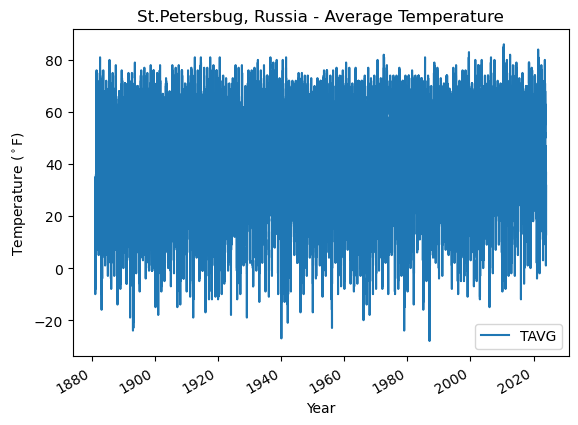

In [8]:
# Try plotting DataFrame to make sure what you are seeing makes sense
sp_climate_df.plot(
   y='TAVG',
   title='St.Petersbug, Russia - Average Temperature',
   xlabel='Year',
   ylabel='Temperature ($^\circ$F)'
)  

## Interpretation Average Temperature Plot
The range of degrees in Fahrenheit in the plot above makes sense - the 
range is within what would be normal for fahrenheit and not something 
extreme like -100 to 400.
Good to move forward with creating 'annual' average temp.

In [9]:
# Create an expressive new variable name for annual temp
## Resample (a type ofmethod) data, setting the frequency of the final 
## data to year start ('YS') using .mean (another type of method)
### Call variable by name at end of cell
ann_sp_climate_df = sp_climate_df.resample('YS').mean()
ann_sp_climate_df

,TAVG
DATE,
1881-01-01,37.460274
1882-01-01,41.443836
1883-01-01,39.750685
1884-01-01,38.715847
1885-01-01,39.813699
...,...
2019-01-01,44.276712
2020-01-01,45.926230
2021-01-01,43.055249


<Axes: title={'center': 'St.Petersbug, Russia - Annual Average Temperature'}, xlabel='Year', ylabel='Temperature ($^\\circ$F)'>

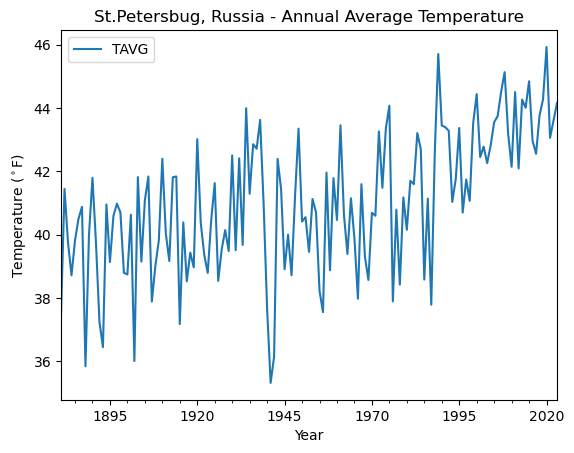

In [10]:
 # Plot this new variable
ann_sp_climate_df.plot(
    y='TAVG',
    title='St.Petersbug, Russia - Annual Average Temperature',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
)

## Interpretation of resampled, year start data
The Annual Average Temperature here seems to be increasing over time.
There are not any gaps in the data where certain years or timeframes are 
missing which is good. There are however a few sudden drops or increases
in the data. I need to create an interactive plot to know when (what year/s) 
these happened in and see if including or jumping to 1943 (approximately)
makes a difference in the overall trend line or not.

In [11]:
# Try creating an interavtive plot 
ann_sp_temp_plot = ann_sp_climate_df.hvplot(
    y='TAVG',
    title='Annual Temperature in St.Petersburg, Russia Over Time',
    xlabel='Date',
    ylabel='Temperature ($^\circ$F)')
ann_sp_temp_plot

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [DATE]   (TAVG)

## Interpretation of Interactive Average Annual Temperature Plot
The particularly steep drop is 1941-1943. Another possible one I may need 
to look out for is 1987 - 1989, but that one from eyeballing it seems
not as drastic as the first one.

Move forward with saving work.

Next steps:

* Try plotting a trend line as is with all the data, including both of 
sharp turns time frames mentioned above.
* Try plotting a trend line, starting data after 1943.
* Try plotting a trend line, starting after 1989 if I have time.

I am curious if the slopes will greatly differ or not.

In [12]:
# Save my work
hv.save(ann_sp_temp_plot, 'st_petersburg_ann_temp_plot.html')

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


In [13]:
%store ann_sp_climate_df

Stored 'ann_sp_climate_df' (DataFrame)


In [14]:
# Import packages needed to calculate and plot an OLS Linear trend line.
## Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [15]:
# Reshape data to be 2D arrays for scikit-learn
predictor = ann_sp_climate_df.index.year.values.reshape(-1, 1)
observed = ann_sp_climate_df['TAVG'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(predictor, observed)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.0304989502413193
Intercept: -18.536096426369156


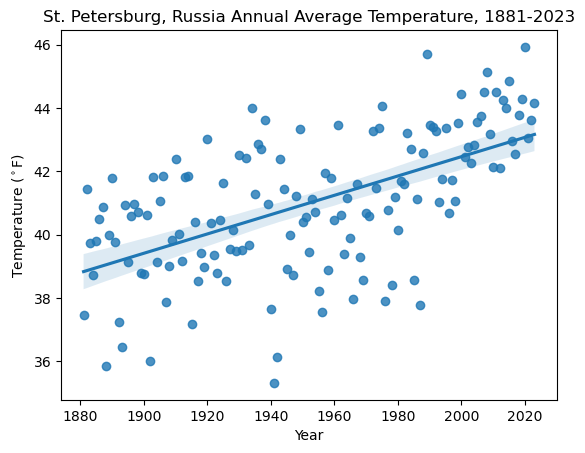

In [16]:
# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x=ann_sp_climate_df.index.year, 
    y=ann_sp_climate_df.TAVG,
    )
# Set plot labels
ax.set(
    title='St. Petersburg, Russia Annual Average Temperature, 1881-2023',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
)
# Display the plot without extra text
plt.show()

## Interpret the trend
### Increase in Annual Average Temperature 1881-2023 in St. Petersburg Russia
### while global annual temperatures also rise due to Gloabl Warming

* The climate is changing in St. Petersburg Russia with an increase in 
temperature over time with a slope 0.03. This means that the 
temperature is increasing by 0.03 degress each year.

## Try looking at slope and trend line of data after 1943

<Axes: title={'center': 'St.Petersbug, Russia - Annual Average Temperature, 1944 - 2023'}, xlabel='Year', ylabel='Temperature ($^\\circ$F)'>

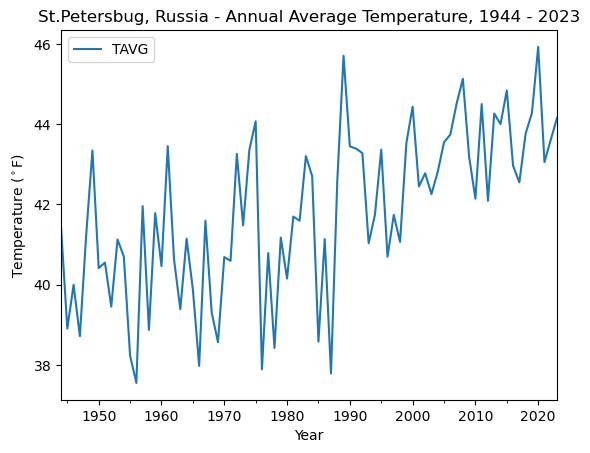

In [24]:
# Clean the data to only include 1944 and beyond
ann_sp_climate_df_clean_1944 = (
    ann_sp_climate_df
    .loc['1944':]
)
# Plot this new clean data post 1943
ann_sp_climate_df_clean_1944.plot(
    y='TAVG',
    title='St.Petersbug, Russia - Annual Average Temperature, 1944 - 2023',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
    )

## Interpret the after 1943 plot

This may be slightly more of a slope than the data that went back to 1881
but need to confirm with finding the slope and doing another trendline plot.

In [18]:
# Reshape data to be 2D arrays for scikit-learn
predictor = ann_sp_climate_df_clean_1944.index.year.values.reshape(-1, 1)
observed = ann_sp_climate_df_clean_1944['TAVG'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(predictor, observed)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.05668220433083306
Intercept: -70.63108173262603


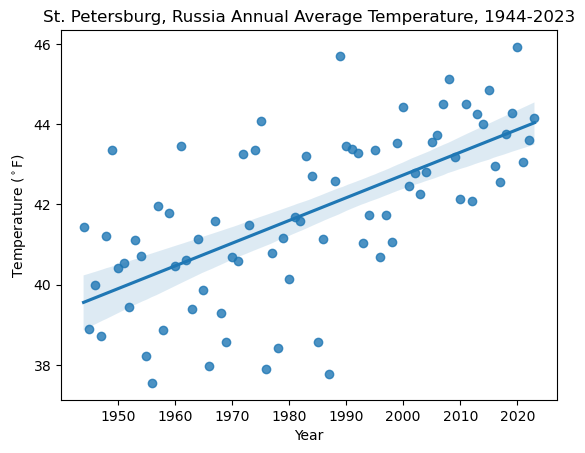

In [19]:
# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x=ann_sp_climate_df_clean_1944.index.year, 
    y=ann_sp_climate_df_clean_1944.TAVG,
    )
# Set plot labels
ax.set(
    title='St. Petersburg, Russia Annual Average Temperature, 1944-2023',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
)
# Display the plot without extra text
plt.show()

## Interpret the Trend after 1943
### Increase in Annual Average Temperature 1944-2023 in St. Petersburg Russia
###  is a Higher Increase in Temp Than the 1881-2023 Trend - while global annual
### temperatures also rose due to Gloabl Warming

* The climate is changing in St. Petersburg Russia with an increase in 
temperature over time with a slope 0.056. This means that the 
temperature is increasing by 0.056 degress each year. This is approxiamtely
0.02 higher than the slope of the 1881-2023 data and I think is more significant.

## Try looking at slope and trend line of data after 1989

<Axes: title={'center': 'St.Petersbug, Russia - Annual Average Temperature, 1990 - 2023'}, xlabel='Year', ylabel='Temperature ($^\\circ$F)'>

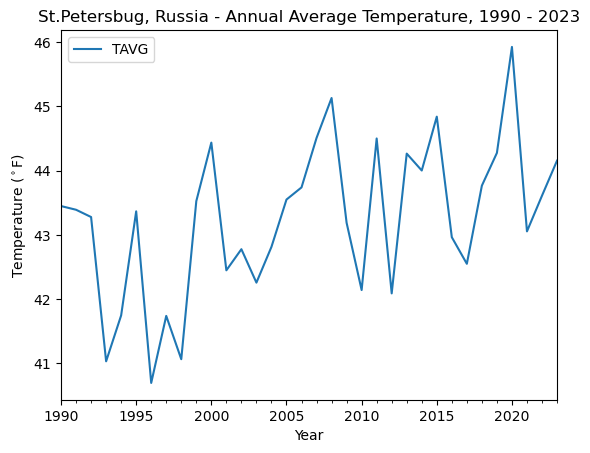

In [23]:
# Clean data to be only 1990 and beyond
ann_sp_climate_df_clean_1990 = (
    ann_sp_climate_df
    .loc['1990':]
)
# Plot this new data for post 1989
ann_sp_climate_df_clean_1990.plot(
    y='TAVG',
    title='St.Petersbug, Russia - Annual Average Temperature, 1990 - 2023',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
    )

## Interpret the after 1989 plot

This seems to be very similar overall to the 1944-2023 plot (less data)
but need to confirm with finding the slope and doing another trendline plot.

In [21]:
# Reshape data to be 2D arrays for scikit-learn
predictor = ann_sp_climate_df_clean_1990.index.year.values.reshape(-1, 1)
observed = ann_sp_climate_df_clean_1990['TAVG'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(predictor, observed)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.05769689515732562
Intercept: -72.52459556040657


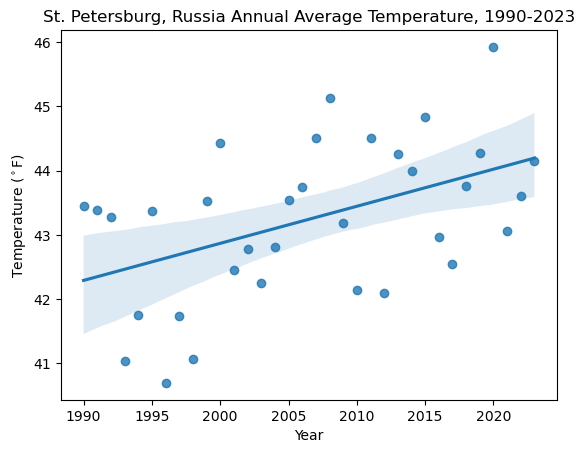

In [22]:
# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x=ann_sp_climate_df_clean_1990.index.year, 
    y=ann_sp_climate_df_clean_1990.TAVG,
    )
# Set plot labels
ax.set(
    title='St. Petersburg, Russia Annual Average Temperature, 1990-2023',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
)
# Display the plot without extra text
plt.show()

## Interpret the Trend after 1989
### Increase in Annual Average Temperature 1990-2023 in St. Petersburg Russia
###  is a Higher Increase in Temp Than the 1881-2023 Trend and only slightly 
### higher than 1944-2023 - while global annual
### temperatures also rose due to Gloabl Warming

* The climate is changing in St. Petersburg Russia with an increase in 
temperature over time with a slope 0.057. This means that the 
temperature is increasing by 0.057 degress each year. This is only 0.001 
higher than the slope of 1944-2023 but has less data associated with it.
I would rather my final conclusions be drawn from the 1944-2023 set.